<a href="https://colab.research.google.com/github/ti-molodykh/colab/blob/main/%D0%9C%D0%BE%D0%BB%D0%BE%D0%B4%D1%8B%D1%85_%D0%A2_%22%D0%93%D1%80%D1%83%D0%BF%D0%BF%D0%BE%D0%B2%D0%BE%D0%B8%CC%86_%D0%BF%D1%80%D0%BE%D0%B5%D0%BA%D1%82__%D0%9F%D0%B5%D1%80%D0%B2%D0%B8%D1%87%D0%BD%D1%8B%D0%B8%CC%86_%D0%B0%D0%BD%D0%B0%D0%BB%D0%B8%D0%B7_%D0%B4%D0%B0%D0%BD%D0%BD%D1%8B%D1%85__ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline 

# Визуальный анализ рейтингов шоу Netflix
<img src="https://pp.userapi.com/c854528/v854528797/c62ce/FiPEibYUxJc.jpg" width="40%">

Netflix за последние 5-10 лет обзавелись большим количеством зрителей. С увеличением числа зрителей увеличилось и разнообразие шоу. Соответственно, перед аналитиками из киноиндустрии встала задача исследования данных с рейтингами различных сериалов.  
В данном задании вам предстоит провести визуальный анализ датасета **1000 Netflix Shows** (по состоянию на 11.06.2017) и сделать выводы.  



Описание признаков:
* `title` - название шоу.
* `rating` - рейтинг шоу. Например: G, PG, TV-14, TV-MA
* `ratingLevel` - описание рейтинговой группы и особенностей шоу.
* `ratingDescription` - рейтинг шоу, закодированный в числом
* `release year` - год выпуска шоу.
* `user rating score` - оценка пользователей.
* `user_rating_size` - общий рейтинг пользователей

## Требования к групповому проекту

В качестве результата ваша группа должна получить презентацию и защитить ее на занятии (**1 декабря в 19:00**).  


Вы можете выбирать оформление презентации, но помните, что результат должен быть релевантен для демонстрации заказчику. Например, вставлять в презентацию строчки кода не стоит :)

Помимо презентации, каждому из участников проекта нужно будет сдать свой notebook c решением на проверку. Наши ассистенты проверят ваш код, визуализацию и выводы, после чего вернутся к вам с фидбеком. 

Вопросы, на которые нужно ответить в презентации: 
- сколько рейтинговых групп представлено в данных?
- какие оценки пользователи ставят чаще всего?
- какие оценки пользователи ставят в среднем?
- в какие годы были запущены шоу?
- можно ли сделать вывод, что 2017 год успешнее для Netflix?
- в каких рейтинговых группах запущены шоу на Netflix?
- выберите любое шоу (например, самое понравившееся) и составьте его описательный портрет. На какие вопросы о нем вам было бы интересно ответить, если бы вы были заказчиком? Ответьте на эти вопросы :) 

Вопросы ниже помогут вам ответить на вопросы и сопроводить выводы релевантной визуализацией. 

Любой хороший аналитик должен уметь работать в команде, поэтому распределение ваших усилий в проекте остается за вами. Как пример, вы можете распределить вопросы/слайды между собой.

При возникновении каких-либо проблем при выполнении группового проекта обязательно сразу пишите куратору. 

**Вам необходимо разделиться на группы по 2-4 человека и записать состав вашей команды.** Ваше выступление должно длиться примерно 10-15 минут.

## Решение

Скачайте данные: [ссылка](https://drive.google.com/file/d/1-AbKfNo1SuKPQgA4Uo9ULfMjyUtJHLRa/view?usp=sharing). Загрузите данные, выполнив код ниже.

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Netflix Shows (2).csv to Netflix Shows (2).csv


In [ ]:
# код ниже менять нельзя, просто запустите ячейку!
data = pd.read_csv("Netflix Shows (2).csv", encoding='cp437')
del data['ratingDescription'], data['user rating size']

Удалите из данных дупликаты. 

In [ ]:
data.drop_duplicates(inplace = True)
data

,title,rating,ratingLevel,release year,user rating score
0,White Chicks,PG-13,"crude and sexual humor, language and some drug...",2004,82.0
1,Lucky Number Slevin,R,"strong violence, sexual content and adult lang...",2006,NaN
2,Grey's Anatomy,TV-14,Parents strongly cautioned. May be unsuitable ...,2016,98.0
3,Prison Break,TV-14,Parents strongly cautioned. May be unsuitable ...,2008,98.0
4,How I Met Your Mother,TV-PG,Parental guidance suggested. May not be suitab...,2014,94.0
...,...,...,...,...,...
989,Russell Madness,PG,some rude humor and sports action,2015,NaN
993,Wiener Dog Internationals,G,General Audiences. Suitable for all ages.,2015,NaN
994,Pup Star,G,General Audiences. Suitable for all ages.,2016,NaN
997,Precious Puppies,TV-G,Suitable for all ages.,2003,NaN


Сколько рейтинговых групп представлено в данных?

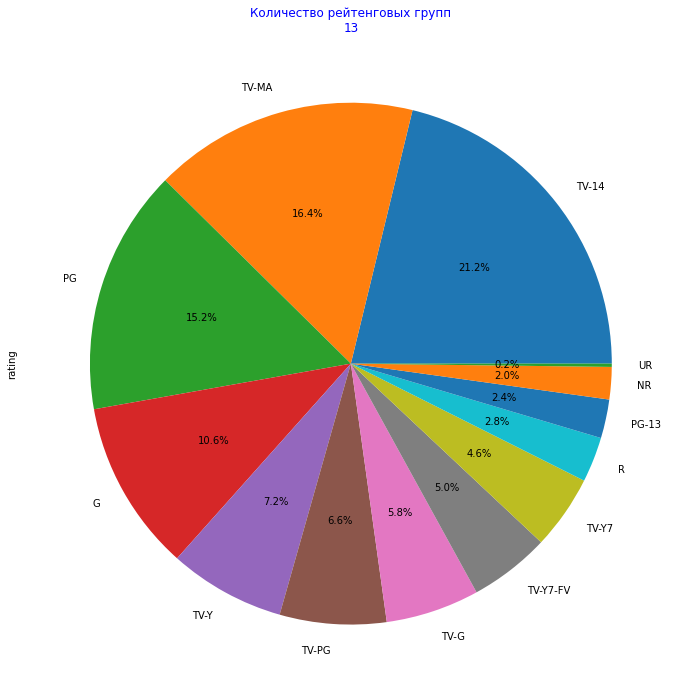

In [ ]:
plt.figure(figsize=(12, 12))
reting=data.groupby('rating')['title'].count()
countrat=reting.count()
plt.title("Количество рейтенговых групп\n"+str(countrat), color='blue')
data['rating'].value_counts().plot(kind= 'pie',autopct='%.1f%%')
plt.rc('font', size= 15)
plt.show()

Какие оценки пользователи ставят чаще? Постройте гистограмму оценок.

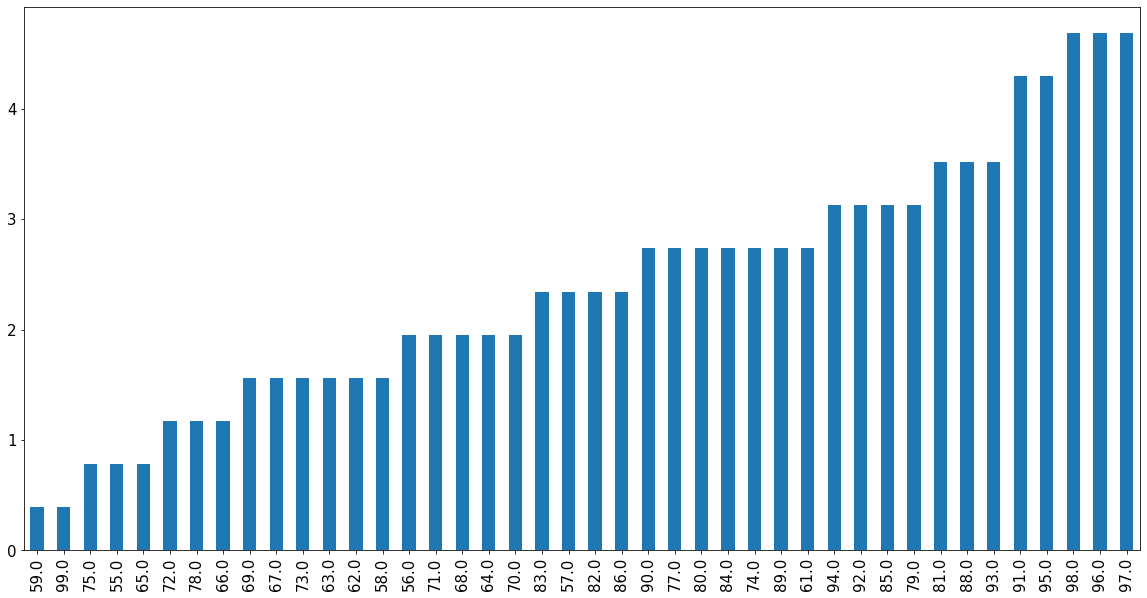

In [ ]:
plt.figure(figsize=[20, 10])
data['user rating score'].value_counts(normalize = True).apply(lambda x: round(x * 100, 3)).sort_values().plot(kind = 'bar')
plt.show()

***Вывод:***Чаще пользователи выставляют следующие оценки 98, 97, 95, 94

Выведите основную информацию об оценках пользователей: среднее, стандартное отклонение, минимум, максимум, медиана. Отличаются ли медиана и среднее? Могут ли данные характеристики значительно отличаться? Почему?

In [ ]:
data.describe()

,release year,user rating score
count,500.000000,256.000000
mean,2010.976000,81.398438
std,7.829305,12.730904
min,1940.000000,55.000000
25%,2009.000000,71.000000
50%,2014.000000,83.500000
75%,2016.000000,93.000000
max,2017.000000,99.000000


Медиана (50%) равна 83.5, среднее (mean) = 81.4, отличаются незначительно. Медиана и среднее могут значительно отличаться, среднее может быть больше или меньше медианы. На среднее значение влияют выбросы. Пользователи ставят в среднем оценку 81.

В какие годы были запущены шоу, представленные в датасете?

In [ ]:
res = data.groupby('release year')['title'].count()
res

release year
1940      1
1976      1
1978      1
1982      2
1986      1
1987      1
1989      2
1990      2
1991      1
1992      1
1993      5
1994      4
1995      2
1996      1
1997      9
1998      9
1999      5
2000      7
2001      6
2002      5
2003     11
2004      7
2005     10
2006     10
2007      8
2008     11
2009     10
2010     13
2011     15
2012     27
2013     33
2014     35
2015     61
2016    146
2017     37
Name: title, dtype: int64

Постройте график, показывающий распределение количества запущенных шоу в зависимости от года. Наблюдается ли рост? Есть ли выбросы?

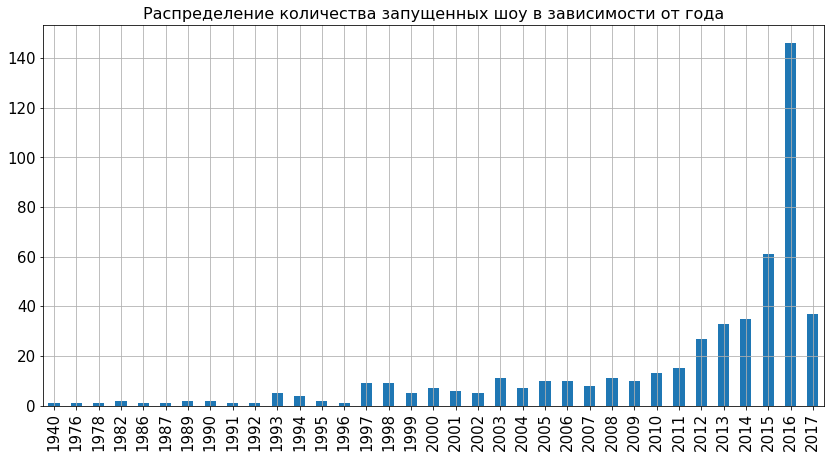

In [ ]:
plt.figure(figsize=(14,7))
plt.title("Распределение количества запущенных шоу в зависимости от года", fontsize = 16)
data['release year'].value_counts().sort_index().plot(kind= 'bar')
plt.grid()
plt.show()

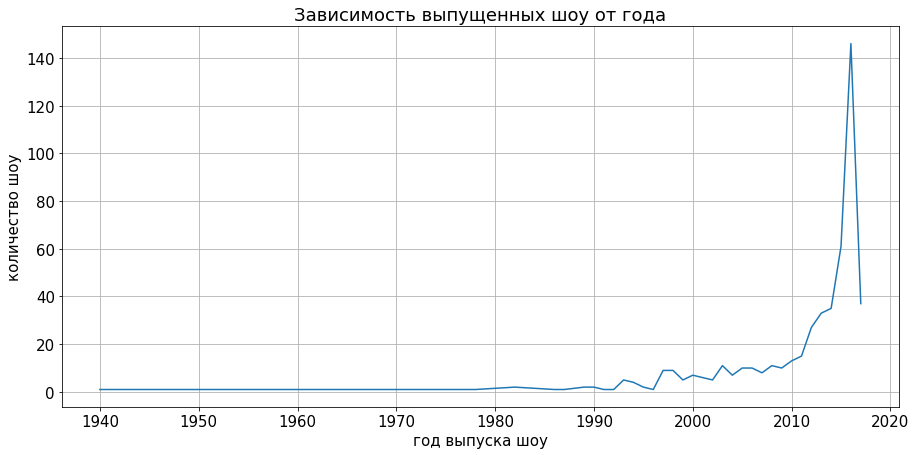

In [ ]:
plt.figure(figsize=[15, 7])
#rst=data['release year'].value_counts(normalize = True).apply(lambda x: round(x * 100, 3))
#rst.sort_index().plot(kind = 'bar')
plt.ylabel('количество шоу')
plt.xlabel('год выпуска шоу')
plt.title('Зависимость выпущенных шоу от года')
plt.plot(res,label='Количество выпущенных шоу')
plt.grid()
plt.show()

Теперь посмотрим на выброс.

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


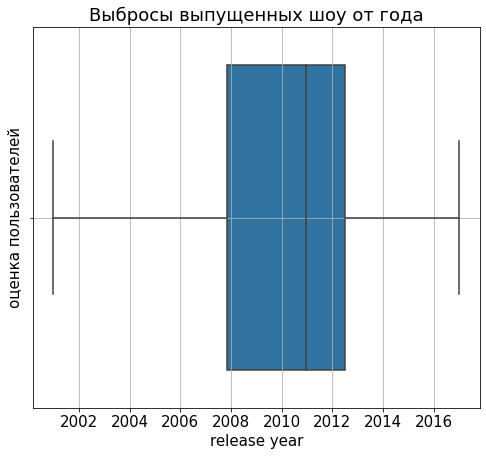

In [ ]:
plt.figure(figsize=(8,7))
#plt.ylabel('количество шоу')
plt.xlabel('год выпуска шоу')
plt.title('Выбросы выпущенных шоу от года')
data['release year'].sort_values(ascending = False)
plt.ylabel('оценка пользователей')
res=data.groupby('user rating score')['release year'].mean()
sns.boxplot(res)
plt.grid()
plt.show()

***Вывод:*** мы видим увеличение количества запущенных шоу с годами. Так же есть выбросы

Сравните среднюю оценку пользователей в 2016 со средней оценкой в 2017. Можно ли сделать вывод, что 2017 год успешнее для Netflix? ("Успешнее" значит, что пользователи в среднем ставили более высокие оценки)  
Ответить на этот вопрос вам поможет график, который вы построили выше.



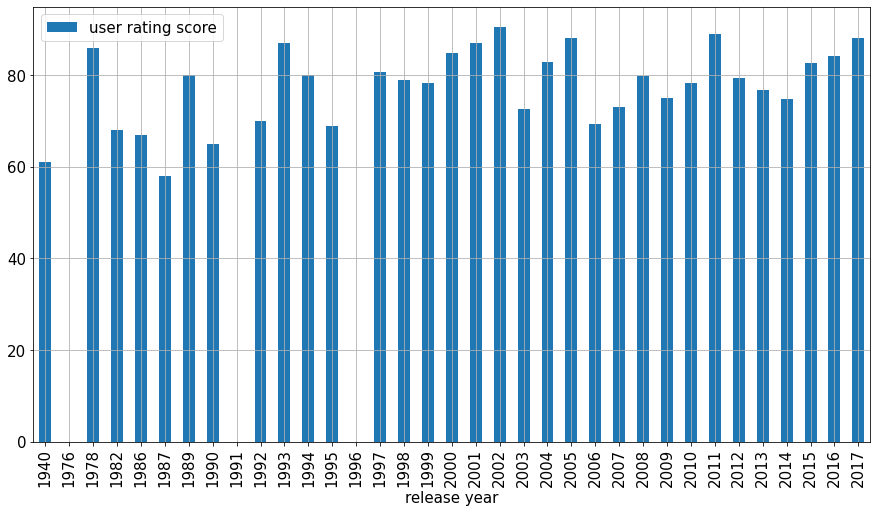

In [ ]:
data.groupby('release year').mean().plot(kind= 'bar', figsize= (15, 8))
plt.grid()

In [ ]:
averrat2016=data[data['release year'] == 2016]['user rating score'].mean()
averrat2017=data[data['release year'] == 2017]['user rating score'].mean()
print(f'Средние оценки пользователей в 2016 году - {averrat2016}')
print(f'Средние оценки пользователей в 2017 году - {averrat2017}')


Средние оценки пользователей в 2016 году - 84.31395348837209
Средние оценки пользователей в 2017 году - 88.125


In [ ]:
data[data['release year'] == 2016].describe()

,release year,user rating score
count,146.0,86.000000
mean,2016.0,84.313953
std,0.0,12.599030
min,2016.0,56.000000
25%,2016.0,77.000000
50%,2016.0,89.000000
75%,2016.0,95.000000
max,2016.0,98.000000


In [ ]:
data[data['release year'] == 2017].describe()

,release year,user rating score
count,37.0,16.000000
mean,2017.0,88.125000
std,0.0,8.585841
min,2017.0,71.000000
25%,2017.0,81.750000
50%,2017.0,90.500000
75%,2017.0,94.000000
max,2017.0,99.000000


***Вывод:***  Средняя оценка пользователей в 2016 году 84.31, в 2017 - 88.12. Количество шоу в 2016 году почти в 4 раза больше, чем в 2017 году. В 2016 году данные заполнены на 58,9%, а в 2017 году на 43,2%. Сделать однозначный вывод об успешности шоу в 2017 для Netflix считаю не корректным.

Ниже представлены два графика, показывающие распределение шоу по рейтинговым группам. Какой тип графика визуально более интерпретируемый? ([Подсказка](https://sun9-40.userapi.com/c854228/v854228652/c754f/j6z5gMjJy2k.jpg))  
Постройте самостоятельно график, который считаете более интерпретируемым. Сделайте вывод.

![Charts](https://pp.userapi.com/c852024/v852024281/1a53b1/jSOsBIhxK3U.jpg)

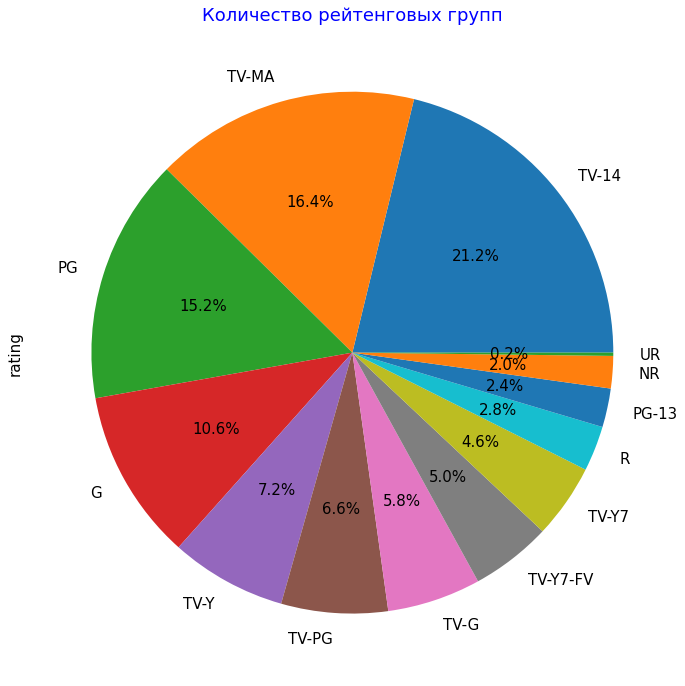

In [ ]:
plt.figure(figsize=(12, 12))
reting=data.groupby('rating')['title'].count()
plt.title("Количество рейтенговых групп", color='blue')
data['rating'].value_counts().plot(kind= 'pie',autopct='%.1f%%')
plt.rc('font', size= 15)
plt.show()

***Вывод:*** Круговая диаграмма дает более интерпретируемые значения с точными числовыми характеристиками, и полную визуализацию данных на одном граффике. Нет необходимости сравнивать высоту баров. Для человеческого глаза  проще анализировать круг, чем последовательность. Наибольшее количество шоу в группе TV-14 (TV, ограничение +14), наименьшее - в группе UR ('тот фильм не был оценен)

Теперь вам нужно выбрать любое из представленных шоу и при помощи изученных инструментов составить описательный портрет этого шоу :) Аналитики и data-scientist-ы очень любят все сравнивать, поэтому при составлении описательного портрета рекомендуем вам сравнить выбранное шоу с другими по каким-либо характеристикам. Результаты не забудьте внести в презентацию. При возникновении трудностей обязательно пишите в чат, преподавателю или ассистентам.

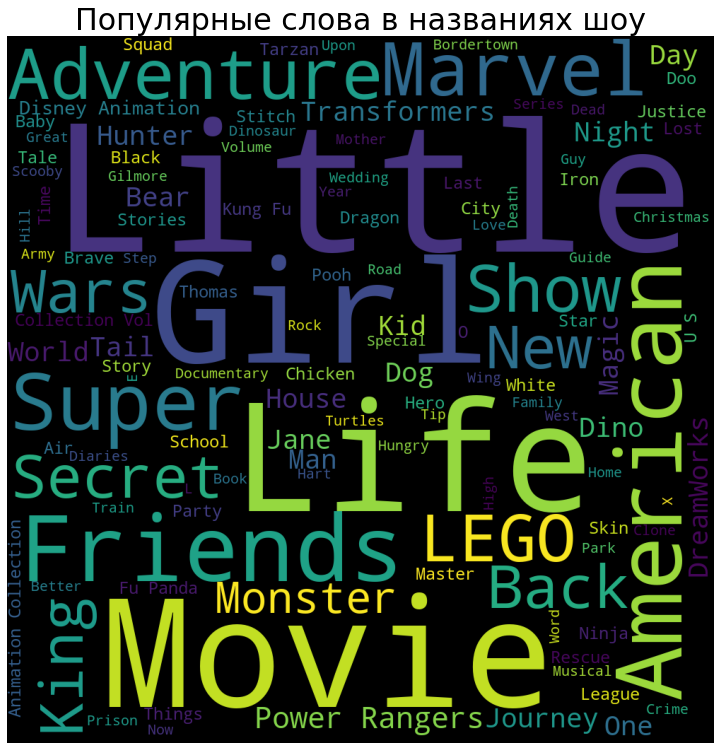

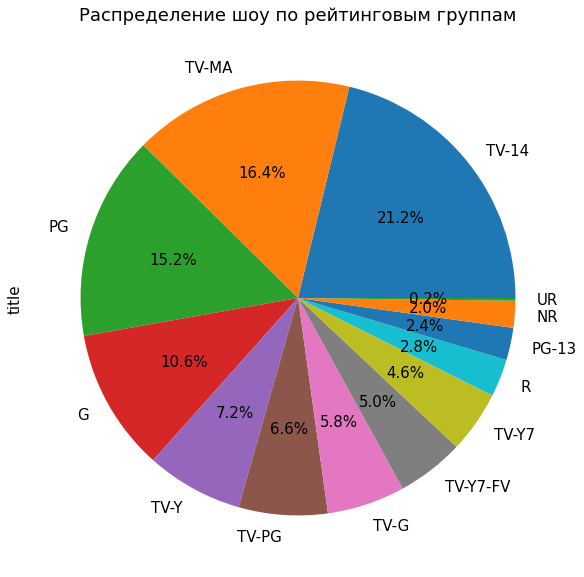

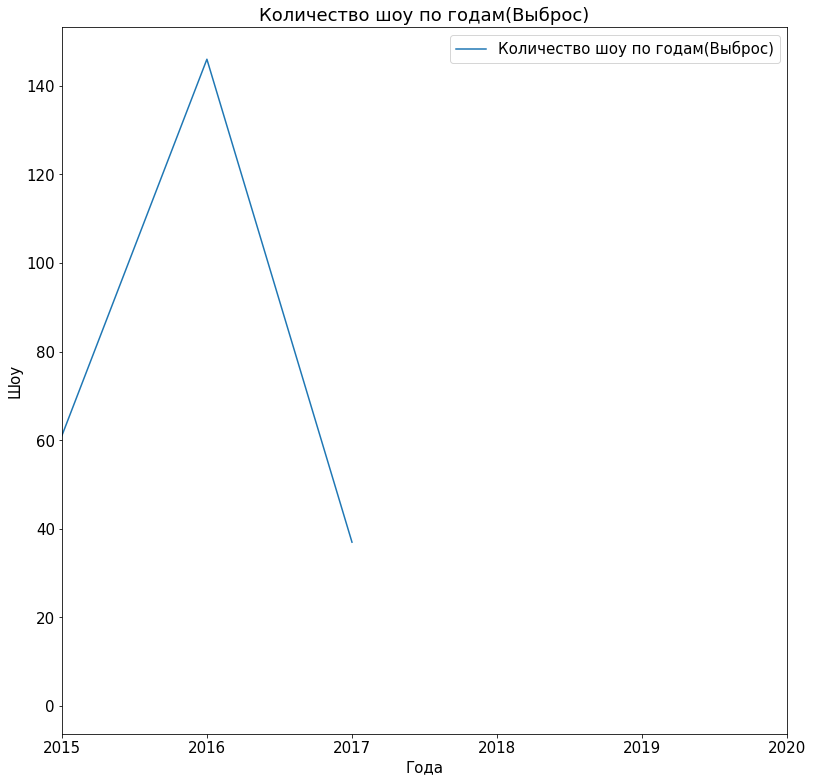

Rating show 'Bones' is TV-14
User rating show 'Bones' is 97.0
Release yare show 'Bones' is 2016


In [ ]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
plt.rcParams['figure.figsize'] = (13, 13)
wordcloud = WordCloud(stopwords=STOPWORDS,background_color = 'black', width = 1000,  height = 1000, max_words = 121).generate(' '.join(del_dubl['title']))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Популярные слова в названиях шоу',fontsize = 30)
plt.show()
rateGroupShow=del_dubl.groupby('rating')['title'].count()
rateGroupShow=rateGroupShow.sort_values(ascending=False)
rateGroupShow.plot(kind='pie', y='value_column',autopct='%.1f%%',title='Распределение шоу по рейтинговым группам',figsize=[10,10])
plt.show()
age_show=del_dubl.groupby('release year')['title'].count()
plt.plot(age_show,label='Количество шоу по годам(Выброс)')
plt.xlabel('Года')
plt.ylabel('Шоу')
plt.xlim(2015,2020,1)
plt.legend()
plt.title('Количество шоу по годам(Выброс)')
plt.show()
ratBones=del_dubl[(del_dubl['title']=='Bones')]
print(f"Rating show 'Bones' is {ratBones['rating'].values[0]}")
print(f"User rating show 'Bones' is {ratBones['user rating score'].values[0]}")
print(f"Release yare show 'Bones' is {ratBones['release year'].values[0]}")

***Вывод:*** В качестве шоу для описание был выбран сериал 'Bones' который выходил с 2005 по 2017 год, в анализируемом файле представлен только в 2016 году, что свидетельствует о не полноте предоставленной информации. В 2016 году произошел всплеск выхода количества шоу, но не их качества, данный сериал выделяется в этом плане, он получил пользовательский рейтинг равный 97, что по факту является практически максимальной оценкой. Сериал попадает по категории в группу TV-14 которая является приоритетной и наиболее массовой в Netflix (как показал предыдущий анализ). В дополнение к анализу сериала, были проанализирован полностью файл на предмет частоты появление тех или иных слов в наименовании. Результат представлен на 1 изображении. Как видим, наиболее часто встречаются слова: Friends(Друзья), Little(Маленький), Girl(Девушки), Life(Жизнь). Это наиболее продаваемые категории.